## A Keras Tutorial on Image Classification With Little Data

Objective: To be able to develop a model for distinguishing cats and dogs using transfer of learning

Source: "Building powerful image classification models using very little data" from blog.keras.io.

Step 1: Download data at: https://www.kaggle.com/c/dogs-vs-cats/data

Step 2: Setup overview
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created cats/ and dogs/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 0-999 in data/train/dogs
- put the dog pictures index 1000-1400 in data/validation/dogs

Step 3: Organize imports

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras import backend as K
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Step 4: Set constants and path 

In [2]:
img_width, img_height = 150, 150

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

Step 5: Manage channel ordering

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

Step 6: Build the model

In [6]:
model = applications.VGG16(include_top=False, weights='imagenet')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

Step 7: Define Image Data Generator and save features

In [9]:
datagen = ImageDataGenerator(rescale=1. / 255)
    
generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
np.save(open('bottleneck_features_train.npy', 'wb'),
            bottleneck_features_train)

generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)
np.save(open('bottleneck_features_validation.npy', 'wb'), bottleneck_features_validation)

Found 2000 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


Step 8: Train

In [11]:
train_data = np.load(open('bottleneck_features_train.npy','rb'))
train_labels = np.array([0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

validation_data = np.load(open('bottleneck_features_validation.npy','rb'))
validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

In [20]:
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(train_data, train_labels,
             epochs=epochs,
             batch_size=batch_size,
             validation_data=(validation_data, validation_labels))

Train on 2000 samples, validate on 800 samples
Epoch 1/50
2000/2000 [==============================] - 0s - loss: 0.4358 - acc: 0.8090 - val_loss: 0.3306 - val_acc: 0.8500
Epoch 2/50
2000/2000 [==============================] - 0s - loss: 0.2662 - acc: 0.8800 - val_loss: 0.2878 - val_acc: 0.8888
Epoch 3/50
2000/2000 [==============================] - 0s - loss: 0.2077 - acc: 0.9140 - val_loss: 0.2773 - val_acc: 0.8888
Epoch 4/50
2000/2000 [==============================] - 0s - loss: 0.1801 - acc: 0.9280 - val_loss: 0.2431 - val_acc: 0.9012
Epoch 5/50
2000/2000 [==============================] - 0s - loss: 0.1488 - acc: 0.9450 - val_loss: 0.2446 - val_acc: 0.9025
Epoch 6/50
2000/2000 [==============================] - 0s - loss: 0.1393 - acc: 0.9465 - val_loss: 0.2814 - val_acc: 0.8975
Epoch 7/50
2000/2000 [==============================] - 0s - loss: 0.1077 - acc: 0.9565 - val_loss: 0.3106 - val_acc: 0.8900
Epoch 8/50
2000/2000 [==============================] - 0s - loss: 0.0765 - ac

Step 9: Plot the accuracy from history

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


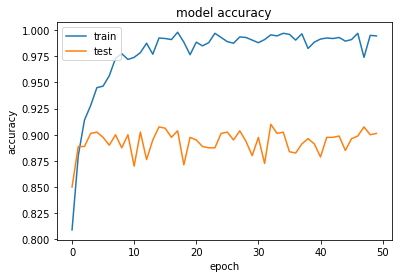

In [22]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()